In [2]:
# --- bootstrap: find src/quantlib ---
import sys
from pathlib import Path

def add_src_to_path(pkg="quantlib", levels_up=3):
    here = Path.cwd().resolve()
    candidates = [here / "src"] + [here.parents[i] / "src" for i in range(levels_up)]
    for p in candidates:
        if (p / pkg / "__init__.py").exists():
            sys.path.insert(0, str(p)); print(f"[OK] sys.path += {p}"); return
    raise FileNotFoundError("src/quantlib not found")

add_src_to_path()

# --- config ---
DATA_RAW = Path(r"C:\Users\quantbase\Desktop\quant\data_raw")
DATA_INT = Path(r"C:\Users\quantbase\Desktop\quant\data_int")
DATA_INT.mkdir(parents=True, exist_ok=True)


[OK] sys.path += C:\Users\quantbase\Desktop\quant\src


In [3]:
# --- bootstrap & imports ---
import sys, pathlib; sys.path.append(str(pathlib.Path.cwd() / "src"))
from pathlib import Path
import numpy as np, pandas as pd
from quantlib import viz as qviz
DATA_INT = Path(r"C:\Users\quantbase\Desktop\quant\data_int")
FIG_DIR = Path(r"C:\Users\quantbase\Desktop\quant\figures"); FIG_DIR.mkdir(exist_ok=True, parents=True)


In [4]:
# --- load returns & define weights (paste your dict) ---
r_1d = pd.read_pickle(DATA_INT/"log_returns_daily.pkl").sort_index()

In [5]:
r_1d.head()

,ZOMATO,ACI,ADANIENT,ADANIPORTS,AEROFLEX,AETHER,AVALON,AXISBANK,BAJFINANCE,BANDHANBNK,...,SWIGGY,SYNGENE,TATACONSUM,TATAELXSI,TATAPOWER,UJJIVANSFB,VBL,VINCOFE,WAAREERTL,WHIRLPOOL
date,,,,,,,,,,,,,,,,,,,,,
2022-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-31,-0.032868,NaN,0.009726,0.008822,NaN,NaN,NaN,0.014157,0.001116,0.023701,...,NaN,-0.002340,0.014969,-0.017565,-0.012699,-0.016751,-0.020504,NaN,NaN,-0.003301
2022-04-01,0.024011,NaN,0.014242,0.014808,NaN,NaN,NaN,0.017452,0.020201,0.041108,...,NaN,-0.000502,0.015825,0.008185,0.028095,0.093466,-0.002553,NaN,NaN,0.019393
2022-04-04,0.022868,NaN,0.010804,0.040896,NaN,NaN,NaN,0.012254,0.011082,-0.004537,...,NaN,0.028389,-0.002155,0.010813,0.026137,0.102279,0.014119,NaN,NaN,0.018320
2022-04-05,-0.027624,NaN,0.035194,0.035405,NaN,NaN,NaN,-0.001276,-0.013738,-0.011038,...,NaN,-0.000570,0.023265,-0.014686,0.082437,0.027399,0.002412,NaN,NaN,0.025479


In [6]:
# paste your cleaned mapping: {"NEWGEN": 7.23, "UJJIVANSFB": 6.41, ...}
# Tip: ensure keys match r_1d.columns; ignore names not present; leftover cols get 0 weight.

weights_pct = {
    "NEWGEN": 7.23,
    "UJJIVANSFB": 6.41,
    "RVNL": 2.50,
    "TATACONSUM": 3.69,
    "DATAPATTNS": 2.73,
    "BAJFINANCE": 4.56,
    "AVALON": 3.64,
    "MCX": 4.26,
    "INDIGO": 2.75,          # InterGlobe Aviation
    "IRFC": 0.80,
    "HDFCBANK": 1.56,
    "DMART": 1.52,           # Avenue Supermarts
    "AXISBANK": 0.68,
    "CDSL": 2.34,            # Central Depository Services
    "IRCTC": 0.57,
    "ADANIPORTS": 1.74,
    "ZOMATO": 0.78,          # “Eternal (Zomato)” → using ZOMATO symbol
    "INOXINDIA": 1.62,
    "ACI": 4.15,             # Archean Chem Inds
    "MAZDOCK": 2.29,
    "SWIGGY": 1.25,
    "SYNGENE": 1.37,
    "PPL": 0.35,             # Prakash Pipes
    "AEROFLEX": 0.99,
    "IDFCFIRSTB": 0.68,
    "VINCOFE": 0.55,         # Vintage Coffee
    "KOTAKBANK": 0.84,
    "SBICARD": 0.39,
    "ADANIENT": 1.74,
    "SBIN": 0.09,
    "JIOFIN": 3.14,
    "CASTROLIND": 0.11,
    "HAPPSTMNDS": 0.12,
    "HAL": 0.95,
    "FEDERALBNK": 0.47,
    "IREDA": 0.86,           # India Renewable Energy Dev. Agency
    "WAAREERTL": 0.54,
    "TATAPOWER": 0.41,
    "KELLTONTEC": 0.84,
    "PREMIERENE": 0.64,
    "CLEAN": 0.51,           # Clean Science
    "COALINDIA": 0.50,
    "RTNPOWER": 0.26,
    "BHEL": 0.81,
    "WHIRLPOOL": 0.22,
    "VBL": 0.51,             # Varun Beverages
    "LATENTVIEW": 0.83,
    "BANDHANBNK": 0.88,
    "HFCL": 0.77,
    "AETHER": 1.63,
    "SPANDANA": 1.22,
    "SONACOMS": 1.30,        # Sona BLW Precision
    "IEX": 0.69,
    "DCXINDIA": 1.34,
    "MTARTECH": 3.65,
    "TATAELXSI": 3.35,
    "PRINCEPIPE": 0.56,
    # Returns are not available:
    # "RAILTEL": 3.20,
    # "MANINDS": 2.70,        # MAN Industries
    # "COCHINSHIP": 0.89,     # Cochin Shipyard
    # "JYOTIRESINS": 2.06,
}


w = pd.Series(weights_pct).rename_axis("symbol")/100.0
w = w.reindex(r_1d.columns).fillna(0.0)
s = float(w.sum()); 
if s <= 0: raise ValueError("Weights sum to zero")
w = w / s  # renormalize to 1
display(w.sort_values(ascending=False).head(10)); print("Sum:", w.sum())

# portfolio returns (ignore days where a weighted asset is NaN by scaling weights of available assets)
def weighted_returns(df, w):
    aligned = df[w.index]
    mask = aligned.notna()
    w_row = (mask * w.values).div((mask * w.values).sum(axis=1), axis=0)
    return (aligned.fillna(0.0) * w_row.fillna(0.0)).sum(axis=1)

r_port = weighted_returns(r_1d, w)
r_port.name = "PORTFOLIO"
r_port.to_pickle(DATA_INT/"portfolio_returns.pkl")
print("r_port:", r_port.shape, r_port.dropna().shape)


NEWGEN        0.079294
UJJIVANSFB    0.070301
BAJFINANCE    0.050011
MCX           0.046721
ACI           0.045514
TATACONSUM    0.040469
MTARTECH      0.040031
AVALON        0.039921
TATAELXSI     0.036741
JIOFIN        0.034437
dtype: float64

Sum: 1.0
r_port: (856,) (856,)


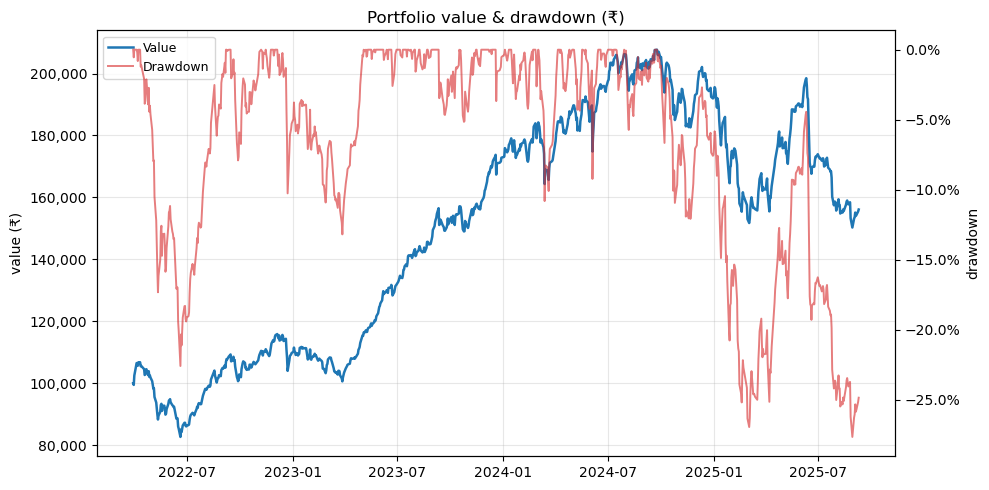

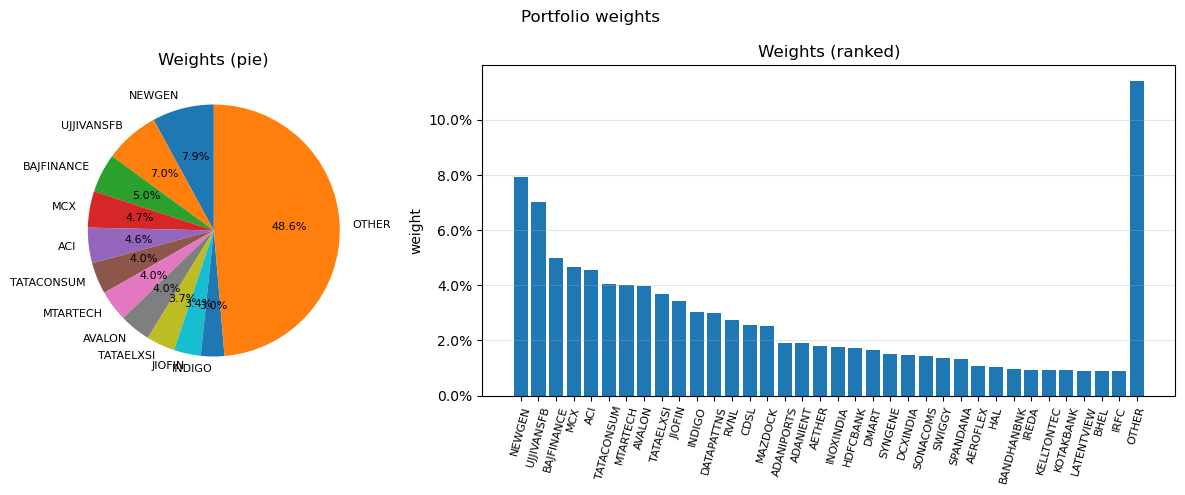

In [7]:
# --- portfolio value & weights visuals ---
NOTIONAL = 100_000
value = NOTIONAL * (1.0 + r_port.fillna(0.0)).cumprod()
qviz.plot_value_and_drawdown(value, title="Portfolio value & drawdown (₹)", save_path=FIG_DIR/"portfolio_value_dd.png")
qviz.plot_weights_pie_and_bars(w, title="Portfolio weights", top_n=35, save_path=FIG_DIR/"weights.png")
